In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# set working directory
import os
os.getcwd()
path = os.getcwd()

In [4]:
path

'/Users/victoriashi/RProjects/SNA_REM/REM_new'

In [6]:
# Load the datasets

low_df = pd.read_csv(path + '/data/low_performance_sessions.csv', index_col=0)
high_df = low_df

In [7]:
high_df.head()

,session,time,sender_id,receiver_id,sender_gender,receiver_gender,dialog
1,2102,1,1,2,Male,Female,disruption
2,2102,2,2,3,Female,Male,statement
3,2102,3,3,1,Male,Male,question
4,2102,4,1,2,Male,Female,statement
5,2102,5,2,1,Female,Male,statement


In [8]:

def create_graph_from_df(df):
    G = nx.Graph()
    for _, row in df.iterrows():
        G.add_edge(row['sender_id'], row['receiver_id'])
    return G

In [9]:
high_G = create_graph_from_df(high_df)
low_G = create_graph_from_df(low_df)

In [10]:
# Compute network metrics
def compute_metrics(G):
    return {
        'density': nx.density(G),
        'degree_centrality': nx.degree_centrality(G),
        'betweenness_centrality': nx.betweenness_centrality(G),
        'average_clustering': nx.average_clustering(G)
    }

In [11]:
high_metrics = compute_metrics(high_G)
display(high_metrics)
low_metrics = compute_metrics(low_G)
display(low_metrics)

{'density': 0.8611111111111112,
 'degree_centrality': {1: 1.0,
  2: 1.25,
  3: 1.125,
  4: 0.75,
  5: 1.0,
  6: 1.0,
  7: 1.125,
  0: 0.25,
  8: 0.25},
 'betweenness_centrality': {1: 0.0,
  2: 0.21428571428571427,
  3: 0.08928571428571427,
  4: 0.0,
  5: 0.0,
  6: 0.0,
  7: 0.08928571428571427,
  0: 0.0,
  8: 0.0},
 'average_clustering': 0.9034391534391533}

{'density': 0.8611111111111112,
 'degree_centrality': {1: 1.0,
  2: 1.25,
  3: 1.125,
  4: 0.75,
  5: 1.0,
  6: 1.0,
  7: 1.125,
  0: 0.25,
  8: 0.25},
 'betweenness_centrality': {1: 0.0,
  2: 0.21428571428571427,
  3: 0.08928571428571427,
  4: 0.0,
  5: 0.0,
  6: 0.0,
  7: 0.08928571428571427,
  0: 0.0,
  8: 0.0},
 'average_clustering': 0.9034391534391533}

Density comparison:
High Performing: 0.8611111111111112
Low Performing: 0.8611111111111112

Degree_centrality comparison:
High Performing: {1: 1.0, 2: 1.25, 3: 1.125, 4: 0.75, 5: 1.0, 6: 1.0, 7: 1.125, 0: 0.25, 8: 0.25}
Low Performing: {1: 1.0, 2: 1.25, 3: 1.125, 4: 0.75, 5: 1.0, 6: 1.0, 7: 1.125, 0: 0.25, 8: 0.25}

Betweenness_centrality comparison:
High Performing: {1: 0.0, 2: 0.21428571428571427, 3: 0.08928571428571427, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.08928571428571427, 0: 0.0, 8: 0.0}
Low Performing: {1: 0.0, 2: 0.21428571428571427, 3: 0.08928571428571427, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.08928571428571427, 0: 0.0, 8: 0.0}

Average_clustering comparison:
High Performing: 0.9034391534391533
Low Performing: 0.9034391534391533



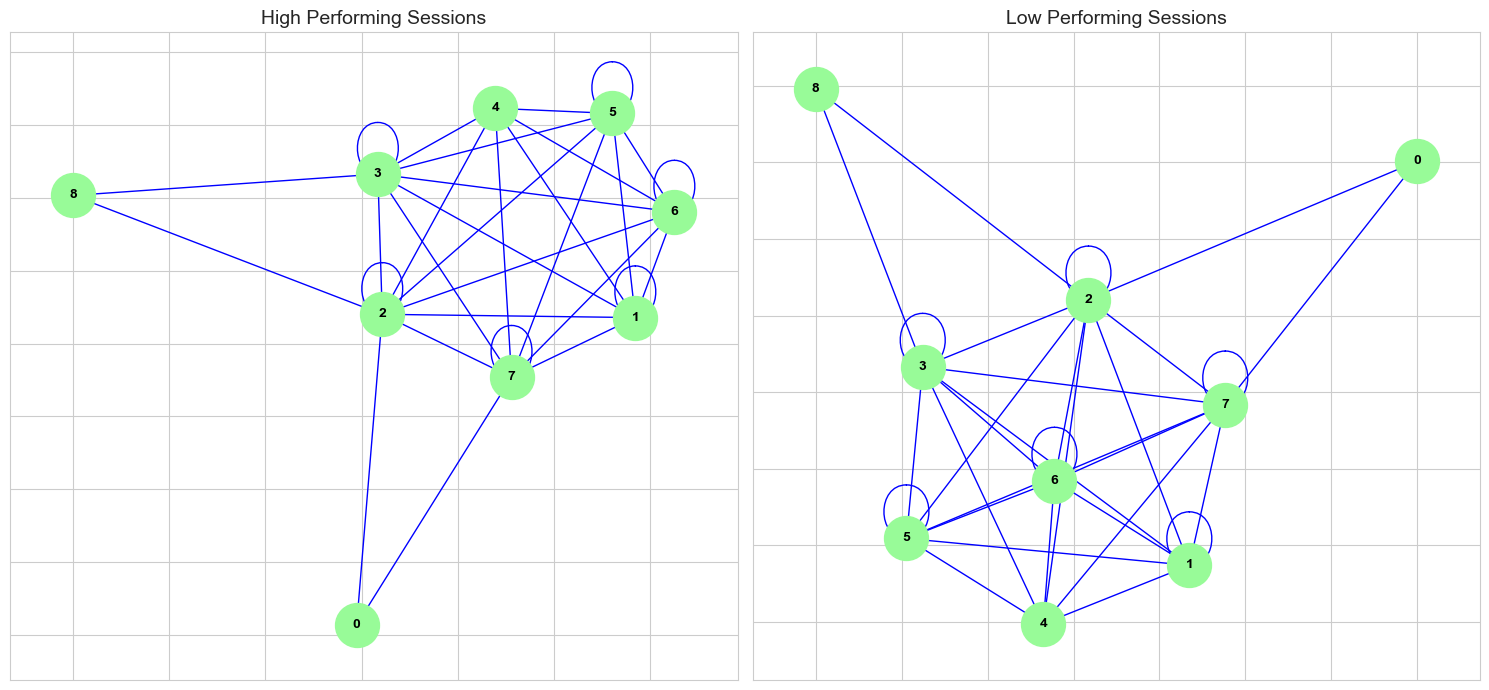

In [27]:

for metric in high_metrics:
    print(f"{metric.capitalize()} comparison:")
    print(f"High Performing: {high_metrics[metric]}")
    print(f"Low Performing: {low_metrics[metric]}\n")

# Visualize both networks
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Draw high-performing network
plt.sca(axes[0])

nx.draw_networkx(high_G, ax=axes[0], node_size=1000, font_size=10, node_color='palegreen', edge_color='blue',with_labels=True, font_color='black', font_weight='bold')
plt.title('High Performing Sessions', fontsize=14)

# Draw low-performing network
plt.sca(axes[1])
nx.draw_networkx(low_G, ax=axes[1], node_size=1000, font_size=10, node_color='palegreen', edge_color='blue',with_labels=True, font_color='black', font_weight='bold')
plt.title('Low Performing Sessions', fontsize=14)


plt.tight_layout()
plt.show()


In [28]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
df_compare = pd.DataFrame(columns=['metric', 'high', 'low'])
df_compare['metric'] = ['modularity', 'average_shortest_path_length', 'clustering_coefficient']

# Load the data
data = high_df


G = nx.from_pandas_edgelist(data, 'sender_id', 'receiver_id', create_using=nx.Graph())


communities = community.greedy_modularity_communities(G)
modularity = community.modularity(G, communities)


hubs, authorities = nx.hits(G)

# Small-worldness
average_shortest_path_length = nx.average_shortest_path_length(G)
clustering_coefficient = nx.average_clustering(G)

# Scale-free properties check
degree_distribution = [G.degree(n) for n in G.nodes()]


# Network Resilience - simulate a failure
G_copy = G.copy()
# Assume nodes are removed from the network
removed_nodes = [n for n in G_copy.nodes() if G_copy.degree(n) > 5]


df_compare['high'] = [modularity, average_shortest_path_length, clustering_coefficient]
# compare high amd low
# Load the data
data = low_df


G = nx.from_pandas_edgelist(data, 'sender_id', 'receiver_id', create_using=nx.Graph())


communities = community.greedy_modularity_communities(G)
modularity = community.modularity(G, communities)


hubs, authorities = nx.hits(G)

# Small-worldness
average_shortest_path_length = nx.average_shortest_path_length(G)
clustering_coefficient = nx.average_clustering(G)

# Scale-free properties check
degree_distribution = [G.degree(n) for n in G.nodes()]


# Network Resilience - simulate a failure
G_copy = G.copy()
# Assume nodes are removed from the network
removed_nodes = [n for n in G_copy.nodes() if G_copy.degree(n) > 5]


df_compare['low'] = [modularity, average_shortest_path_length, clustering_coefficient]
# Cre

In [29]:
df_compare

,metric,high,low
0,modularity,0.135796,0.135796
1,average_shortest_path_length,1.305556,1.305556
2,clustering_coefficient,0.903439,0.903439


In [30]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [31]:


# Creating the DataFrame
attribute_table = pd.DataFrame({
    'id': range(9),  # equivalent to 0:8 in R
    'name': ["All", "Igor", "Ashley", "Will", "Katya", "Saleh", "Oleg", "Vika", "Alex"]
})

gender_assumptions = {
    'All': 'NA',  # Assuming 'M' for Male, 'F' for Female as placeholders
    'Igor': 'M',
    'Ashley': 'F',
    'Will': 'M',
    'Katya': 'F',
    'Saleh': 'M',
    'Oleg': 'M',
    'Vika': 'F',
    'Alex': 'M'
}
attribute_table['gender'] = attribute_table['name'].map(gender_assumptions)

print(attribute_table)


   id    name gender
0   0     All     NA
1   1    Igor      M
2   2  Ashley      F
3   3    Will      M
4   4   Katya      F
5   5   Saleh      M
6   6    Oleg      M
7   7    Vika      F
8   8    Alex      M


In [32]:
data

,session,time,sender_id,receiver_id,sender_gender,receiver_gender,dialog
1,2102,1,1,2,Male,Female,disruption
2,2102,2,2,3,Female,Male,statement
3,2102,3,3,1,Male,Male,question
4,2102,4,1,2,Male,Female,statement
5,2102,5,2,1,Female,Male,statement
...,...,...,...,...,...,...,...
6659,2117,6659,6,2,Male,Female,question
6660,2117,6660,2,6,Female,Male,statement
6661,2117,6661,6,7,Male,Female,statement
6662,2117,6662,7,6,Female,Male,statement


In [33]:

# Predictors and target variable
X = data[['sender_id', 'receiver_id', 'sender_gender', 'receiver_gender']]
y = data['dialog'].astype('category')

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
model = Sequential()
# model.add(Flatten())
model.add(Dense(y.shape[1], activation='softmax'))

IndexError: tuple index out of range

In [36]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


ValueError: You must call `compile()` before using the model.

In [37]:
import networkx as nx
import matplotlib.pyplot as plt
communications = high_df[['sender_id', 'receiver_id']]

# Map sender and receiver genders
communications['sender_gender'] = communications['sender_id'].map(attribute_table.set_index('id')['gender'])
communications['receiver_gender'] = communications['receiver_id'].map(attribute_table.set_index('id')['gender'])

print(communications)

      sender_id  receiver_id sender_gender receiver_gender
1             1            2             M               F
2             2            3             F               M
3             3            1             M               M
4             1            2             M               F
5             2            1             F               M
...         ...          ...           ...             ...
6659          6            2             M               F
6660          2            6             F               M
6661          6            7             M               F
6662          7            6             F               M
6663          6            2             M               F

[6663 rows x 4 columns]


Interaction counts by gender:
receiver_gender     F     M  NA
sender_gender                  
F                 912  2057   6
M                2061  1627   0


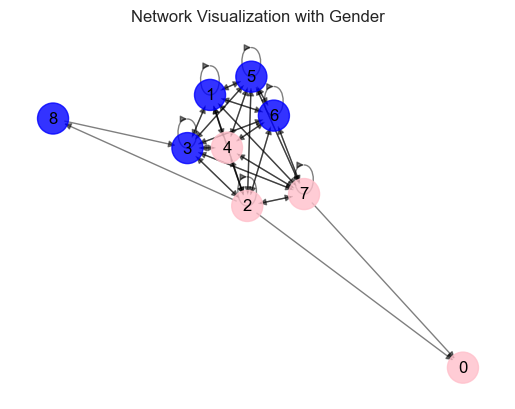

In [38]:

# Create a graph from the communications DataFrame
G = nx.from_pandas_edgelist(communications, 'sender_id', 'receiver_id', create_using=nx.DiGraph())

gender_dict = attribute_table.set_index('id')['gender'].to_dict()
nx.set_node_attributes(G, gender_dict, 'gender')

# Simple network analysis example: Count interactions by gender
interaction_counts = communications.groupby(['sender_gender', 'receiver_gender']).size().unstack(fill_value=0)
print("Interaction counts by gender:")
print(interaction_counts)

# Visualization
pos = nx.spring_layout(G)  # positions for all nodes

# Draw nodes with different colors for different genders
colors = ['blue' if G.nodes[node]['gender'] == 'M' else 'pink' for node in G]
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=500, alpha=0.8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos)

plt.title("Network Visualization with Gender")
plt.axis('off')
plt.show()


Interaction counts by gender:
receiver_gender     F     M  NA
sender_gender                  
F                 912  2057   6
M                2061  1627   0


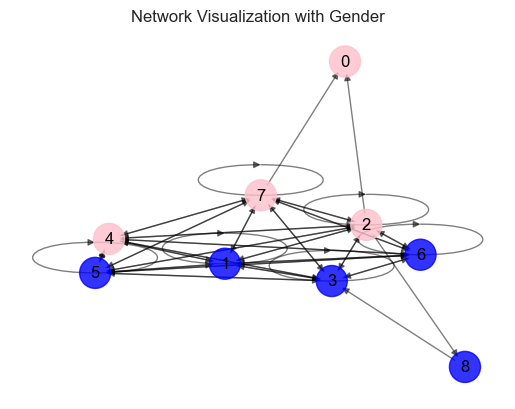

In [39]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph from the communications DataFrame
G = nx.from_pandas_edgelist(communications, 'sender_id', 'receiver_id', create_using=nx.DiGraph())

# Add gender attributes to nodes
gender_dict = attribute_table.set_index('id')['gender'].to_dict()
nx.set_node_attributes(G, gender_dict, 'gender')

interaction_counts = communications.groupby(['sender_gender', 'receiver_gender']).size().unstack(fill_value=0)
print("Interaction counts by gender:")
print(interaction_counts)

# Visualization
pos = nx.spring_layout(G)  # positions for all nodes

# Draw nodes with different colors for different genders
colors = ['blue' if G.nodes[node]['gender'] == 'M' else 'pink' for node in G]
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=500, alpha=0.8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos)

plt.title("Network Visualization with Gender")
plt.axis('off')
plt.show()


In [47]:
# Calculate the number of interactions based on sender and receiver genders
interaction_counts = communications.groupby(['sender_gender', 'receiver_gender']).size().unstack(fill_value=0)

print(interaction_counts)

# Extracting the count of male-to-male interactions
male_to_male_count = interaction_counts.loc['M', 'M']
total_interactions = communications.shape[0]

print(f"Male to Male interactions: {male_to_male_count}")
print(f"Total interactions: {total_interactions}")
print(f"Percentage of Male to Male interactions: {male_to_male_count / total_interactions * 100:.2f}%")


receiver_gender     F     M  NA
sender_gender                  
F                 912  2057   6
M                2061  1627   0
Male to Male interactions: 1627
Total interactions: 6663
Percentage of Male to Male interactions: 24.42%


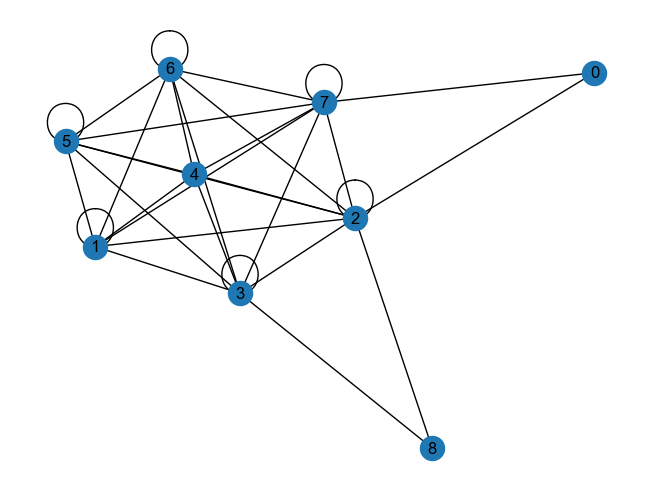

In [48]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from statsmodels.discrete.discrete_model import Logit
from sklearn.metrics import classification_report
# Assuming CSV files are in the current working directory
high_perf = high_df
low_perf = low_df
# Selecting attributes from the high-performance dataset as an example
attributes = high_perf.iloc[:, 4:13]  # Adjust indices as needed

# Save attributes to a file (optional)
attributes.to_pickle("data/attributes.pkl")  # Using pickle for simplicity
G = nx.from_pandas_edgelist(high_perf, 'sender_id', 'receiver_id')
nx.draw(G, with_labels=True)
plt.show()


## New

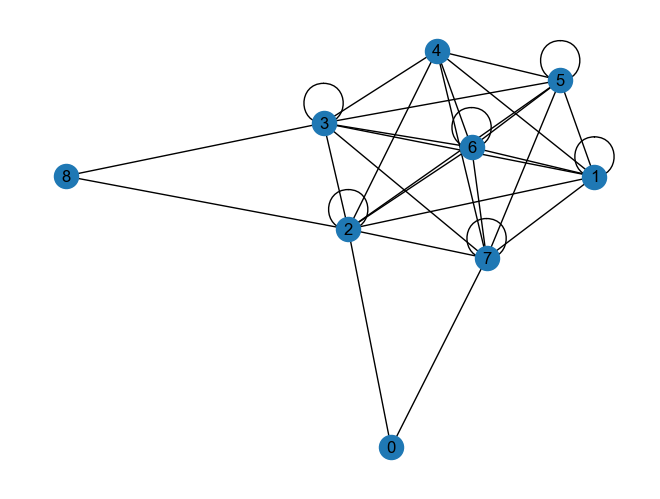

In [42]:
G = nx.from_pandas_edgelist(high_perf, 'sender_id', 'receiver_id')
nx.draw(G, with_labels=True)
plt.show()

In [55]:

X = high_perf.drop(columns=['dialog'])
y = high_perf['dialog']
from sklearn.preprocessing import LabelEncoder
# Initialize the label encoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(high_perf['dialog'])

print(label_encoder.classes_)

['backchannel' 'disruption' 'floor-grabber' 'question' 'statement']


In [52]:
if isinstance(X, pd.DataFrame):
    X = X.values

In [56]:
X.drop(columns=[ 'time'], inplace=True)

In [59]:
from statsmodels.discrete.discrete_model import MNLogit
model = MNLogit(y, X).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [58]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Predict the dialog for the high-performance dataset
y_pred = model.predict(X)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y, y_pred))

In [258]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)


array([[   0,    0,    0,    0,  342],
       [   0,    0,    0,    0,  266],
       [   0,    0,    0,    0,  517],
       [   0,    0,    0,    0, 2519],
       [   0,    0,    0,    0, 6235]])

In [244]:
X

,session,sender_id,receiver_id,sender_gender,receiver_gender
1,2103,6,2,1,0
2,2103,2,6,0,1
3,2103,6,2,1,0
4,2103,2,4,0,0
5,2103,4,7,0,0
...,...,...,...,...,...
9875,2118,7,3,0,1
9876,2118,3,5,1,1
9877,2118,5,7,1,0
9878,2118,7,3,0,1


In [255]:
import numpy as np

model = MNLogit(y, X).fit()
summary = model.summary()
params = model.params
model.params.shape

Optimization terminated successfully.
         Current function value: 1.004218
         Iterations 7


(5, 4)

In [249]:
params.shape

(5, 4)

In [60]:

# Plotting
plt.figure(figsize=(10, 6))
for i in range(params.shape[1]):
    plt.plot(params[i], label=f'Class {i}')

plt.title('Coefficients for Each Class')
plt.xticks(np.arange(len(params)), params, rotation=90)
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()

NameError: name 'params' is not defined

<Figure size 1000x600 with 0 Axes>

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
predictions = model.predict(X)
predictions = np.argmax(predictions, axis=1)
cm = confusion_matrix(y, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

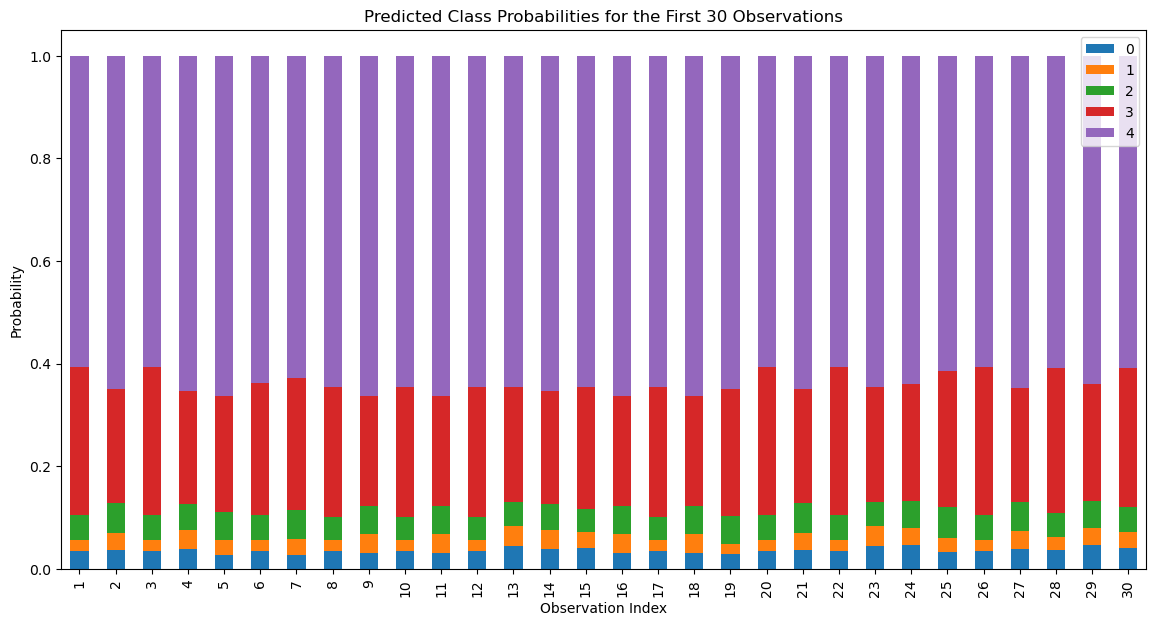

In [257]:
predictions.iloc[:30].plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Predicted Class Probabilities for the First 30 Observations')
plt.xlabel('Observation Index')
plt.ylabel('Probability')
plt.show()
